#  Deutsch’s algorithm
<span style="font-size: 20px;"> The Deutsch’s algorithm is a quantum one used to find out if a given function is constant or balanced. </span>

# What is the problem?
<span style="font-size: 20px;">

Let us consider the following problem: There is a univariate function f , defined over the binary alphabet 0 , 1 , with output range in the same alphabet 0 , 1 . (I.e., f : 0 , 1 ⟶ 0 , 1). 
There are four possible outputs for the function f : \
1- Both inputs 0 , 1 are mapped to the output 0 : f ( 0 ) = f ( 1 ) = 0  \
2- Both inputs 0 , 1 are mapped to the output 1 : f ( 0 ) = f ( 1 ) = 1  \
3- Inputs pass through f unchanged: f ( 0 ) = 0 and f ( 1 ) = 1  \
4- Inputs are exchanged after passing through f : f ( 0 ) = 1 and f ( 1 ) = 0 <br> <br>
While the first two cases indicates **constant** function, the third and forth cases indicate balanced **function** 
<br> -------------------------------------------------------------------------------------------------------------------------------------------------------
</span>

In [1]:
# Here we can define the f(x) -> Balanced
def f(x):
    if x == 0:
        return 0
    elif x == 1:
        return 1
    else:
        raise ValueError("Input must be 0 or 1")

# What is the solution?
<span style="font-size: 20px;">
Let's compare between classical solution and quantum solution: <br>
    <h3>1- classical Approach</h3>
    In the classical sense, an algorithm that solves this problem would implement an if-then-else statement:
</span>

In [2]:
if f(0) == 0:
	if f(1) == 0:
		print("Constant")
	else: 
		print("Balanced")
else:
	if f(1) == 0:
		print("Balanced")
	else: 
		print("Constant")


Balanced


<span style="font-size: 18px;">
As you can see, we require two function evaluations to figure out the answer. <br>
In the next sections, we will see how we use the superposition of states in quantum machines to solve the problem in one query only.<br>
    -------------------------------------------------------------------------------------------------------------------------------------------------------
</span>

<br>

<span style="font-size: 18px;">
    <h3>2- Quantum Approach (Deutsch Algorithm)</h3>
    <h4>Quantum representation: first attempt</h4>
    For simplicity, we will make the assumption that f maps inputs as: f ( 0 ) = 1 and f ( 1 ) = 0 (Balanced). <br>
    But we will pretend we do not know that this is f ; similar logic can be derived for other cases of f . The above behavior –assuming we represent bits as vectors
</span>

In [8]:
###Imports
from qiskit.visualization import circuit_drawer
from qiskit import QuantumCircuit
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit, Aer, execute
from qiskit.quantum_info import Operator
import sys
from io import StringIO
import numpy as np





|ϕ0⟩ = 1.0 |00⟩
|ϕ1⟩ = 0.707 |00⟩ + 0.707 |10⟩
|ϕ2⟩ = 0.707 |10⟩ + 0.707 |01⟩
{'1': 1}


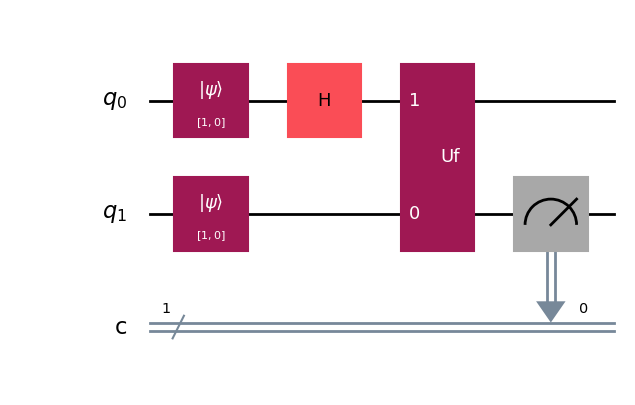

In [13]:


def apply_uf(circuit, Uf_matrix, control_qubit, target_qubit):

    

    original_matrix = np.array([[0,1 ,0, 0],
                                 [1,0 ,0 ,0],
                                 [0 ,0 ,1,0],
                                 [0 ,0 ,0,1]])
    


    Gate = Operator(original_matrix)
    
    # # Apply Uf gate to the control qubit
    circuit.unitary(Gate, [control_qubit, target_qubit], label='Uf')

    


# Use the statevector simulator to get the state vector
simulator = Aer.get_backend('statevector_simulator')

# Create a quantum circuit with 3 qubits
qr = QuantumRegister(2, 'q')
cr = ClassicalRegister(1, 'c')  # Use a classical register with 1 bit for measurement
qc = QuantumCircuit(qr, cr)


# Initialize the first and second qubits to |0>
qc.initialize([1, 0], 0)  # Initialize qubit 0 to |0>
qc.initialize([1, 0], 1)  # Initialize qubit 1 to |0>


result = execute(qc, simulator).result()
statevector = result.get_statevector()
print_vector(statevector,0)


# Apply a Hadamard gate to the first qubit
qc.h(0)


result = execute(qc, simulator).result()
statevector = result.get_statevector()
print_vector(statevector,1)

# Define the custom Uf matrix based on f(x)
Uf_matrix = [[0 , 1 ], [ 1 , 0 ]]

# Apply the Uf oracle
apply_uf(qc, Uf_matrix, qr[1], qr[0])

result = execute(qc, simulator).result()
statevector = result.get_statevector()
print_vector(statevector,2)

# Measure only the first qubit and store the result in the classical register
qc.measure(qr[1], cr[0])

# Choose a simulator backend
backend = Aer.get_backend('qasm_simulator')

# Execute the circuit on the chosen backend
job = execute(qc, backend, shots=1)

# Get the measurement result for the first qubit
result = job.result()
counts = result.get_counts()
print(counts)

# Draw the circuit
draw_circuit(qc)


<span style="font-size: 20px;">If we measure the top output, we get 50-50 chance to find in either states; similarly for the bottom qubit. Thus, the above give us no information regarding the nature of f. But, we will soon see how we can use this combined with the next subsection. <br>
   
</span>
$$
|\phi_0\rangle = |00\rangle = \begin{bmatrix} 1 \\ 0 \\ 0 \\ 0 \end{bmatrix}
$$
$$
|\phi_1\rangle = |H \cdot 0, 0\rangle = \left[ \frac{|0\rangle + |1\rangle}{\sqrt{2}}, 0 \right] = \frac{|00\rangle + |10\rangle}{\sqrt{2}}
$$

$$
|\phi_2\rangle = \frac{1}{\sqrt{2}} (|x, y \oplus f(x)\rangle + |x, y \oplus f(x)\rangle)
$$
$$
= \frac{1}{\sqrt{2}} (|0, 0 \oplus f(0)\rangle + |1, 0 \oplus f(1)\rangle)
$$
$$
= \frac{|01\rangle + |10\rangle}{\sqrt{2}}
$$


<br>
<span style="font-size: 16px;">



     
 <h2>Quantum representation: Second attempt</h2>
    <img src="https://akyrillidis.github.io/notes/quant_8/secondattempt.png" width="600px" height="600px"> <br>
    Here, we leave the top input as it is, but we transform the bottom input – which we set to | 1 ⟩ – with a Hadamard matrix.
</span>
$$
|\phi_0\rangle = |x, 1\rangle 
$$
$$
|\phi_1\rangle = |x, H \cdot 1\rangle = \frac{|x, 0\rangle - |x, 1\rangle}{\sqrt{2}}
$$
$$
|\phi_2\rangle = \left(-1\right)^{f(x)}\frac{|x, 0\rangle - |x, 1\rangle}{\sqrt{2}}
$$



|ϕ0⟩ = 1.0 |11⟩
|ϕ1⟩ = 0.707 |10⟩  -0.707 |11⟩
|ϕ2⟩ = 0.707 |10⟩  -0.707 |11⟩
{'0': 1}


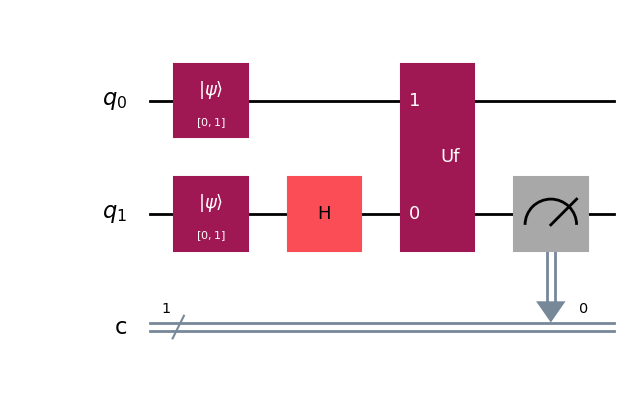

In [14]:

def apply_uf(circuit, Uf_matrix, control_qubit, target_qubit):

    

    original_matrix = np.array([[0,1 ,0, 0],
                                 [1,0 ,0 ,0],
                                 [0 ,0 ,1,0],
                                 [0 ,0 ,0,1]])
    


    Gate = Operator(original_matrix)
    
    # # Apply Uf gate to the control qubit
    circuit.unitary(Gate, [control_qubit, target_qubit], label='Uf')

    


# Use the statevector simulator to get the state vector
simulator = Aer.get_backend('statevector_simulator')

# Create a quantum circuit with 3 qubits
qr = QuantumRegister(2, 'q')
cr = ClassicalRegister(1, 'c')  
qc = QuantumCircuit(qr, cr)


qc.initialize([0, 1], 0)  # Initialize qubit 0 to |1>
qc.initialize([0, 1], 1)  # Initialize qubit 1 to |1>


result = execute(qc, simulator).result()
statevector = result.get_statevector()
print_vector(statevector,0)


# Apply a Hadamard gate to the second qubit
qc.h(1)


result = execute(qc, simulator).result()
statevector = result.get_statevector()
print_vector(statevector,1)

# Define the custom Uf matrix based on f(x)
Uf_matrix = [[0 , 1 ], [ 1 , 0 ]]

# Apply the Uf oracle
apply_uf(qc, Uf_matrix, qr[1], qr[0])

result = execute(qc, simulator).result()
statevector = result.get_statevector()
print_vector(statevector,2)

# Measure only the first qubit and store the result in the classical register
qc.measure(qr[1], cr[0])

# Choose a simulator backend
backend = Aer.get_backend('qasm_simulator')

# Execute the circuit on the chosen backend
job = execute(qc, backend, shots=1)

# Get the measurement result for the first qubit
result = job.result()
counts = result.get_counts()
print(counts)

draw_circuit(qc)


### it turns out that again, we cannot figure out the nature of the function f with this circuit configuration, by just using the output.

<br>
<span style="font-size: 16px;">



     
 <h2>Quantum representation: Third attempt</h2>
    <img src="https://akyrillidis.github.io/notes/quant_8/thirdattempt.png" width="600px" height="600px"> <br>
    Now, we end up with the final setting, that will lead us to the Deutsch algorithm.
</span>
$$
|\phi_0\rangle = |0, 1\rangle 
$$
$$
|\phi_1\rangle = |H \cdot 0, H \cdot 1\rangle = \frac{|x, 0\rangle - |x, 1\rangle}{\sqrt{2}}
$$
$$
|\phi_2\rangle = \left(-1\right)^{f(x)}\frac{|x, 0\rangle - |x, 1\rangle}{\sqrt{2}} = \frac{|0\rangle + |1\rangle}{\sqrt{2}} \otimes \frac{|0\rangle - |1\rangle}{\sqrt{2}}
$$

In the next step, we go through the function f; remember that this function uses the top input to define the output. So far, the top input has the form:
$$
\frac{|0\rangle + |1\rangle}{\sqrt{2}}
$$
By using the abstract description of the output of f  in the previous attempt, a different way to write that output is:
$$
|\phi_2\rangle = \left(-1\right)^{f(x)}\frac{|x, 0\rangle - |x, 1\rangle}{\sqrt{2}} =  |\phi_2\rangle = \left(-1\right)^{f(x)}|x\rangle   \otimes \frac{ |0\rangle - |1\rangle}{\sqrt{2}}
$$
using this formula in this attempt we can conclude
$$
|\phi_2\rangle = \frac{(-1)^{f(0)}|0\rangle + (-1)^{f(1)}|1\rangle}{\sqrt{2}} \otimes \frac{|0\rangle - |1\rangle}{\sqrt{2}}.
$$
let's consider the case we are using here that the oracle function is balanced (f(0)=1 and f(1)=0)
$$
|\phi_2\rangle = (-1) \frac{|0\rangle - |1\rangle}{\sqrt{2}} \otimes \frac{|0\rangle - |1\rangle}{\sqrt{2}}
$$
by repeating the same for a constant function we can conclude the following:
$$
|\phi_2\rangle = 
\begin{cases} 
\left(\pm 1\right)|+\rangle \otimes \frac{|0\rangle - |1\rangle}{\sqrt{2}}, & \text{if } f \text{ is constant},\\
\left(\pm 1\right)|-\rangle\otimes \frac{|0\rangle - |1\rangle}{\sqrt{2}}, & \text{if } f \text{ is balanced}.
\end{cases}
$$
Apply hadamard on the first qubit
$$
|\phi_2\rangle = 
\begin{cases} 
\left(\pm 1\right)|0\rangle \otimes \frac{|0\rangle - |1\rangle}{\sqrt{2}}, & \text{if } f \text{ is constant},\\
\left(\pm 1\right)|1\rangle\otimes \frac{|0\rangle - |1\rangle}{\sqrt{2}}, & \text{if } f \text{ is balanced}.
\end{cases}
$$

Now we can differ between constant and balanced fucntions by measuring only the first qubit
let's try

|ϕ0⟩ = 1.0 |01⟩
|ϕ1⟩ = 0.5 |00⟩ + 0.5 |10⟩  -0.5 |01⟩  -0.5 |11⟩
|ϕ2⟩ = 0.5 |00⟩  -0.5 |10⟩  -0.5 |01⟩ + 0.5 |11⟩
balanced


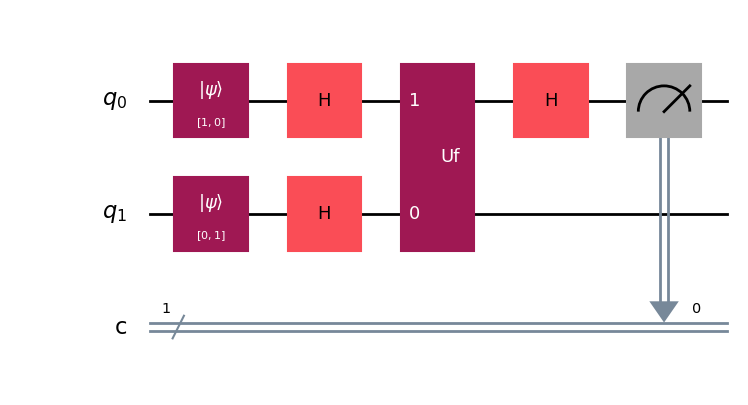

In [25]:
def balanced_or_constant(oracle_matrix):

    
    def apply_uf(circuit, Uf_matrix, control_qubit, target_qubit):
    
        original_matrix = np.array([[1-Uf_matrix[0],Uf_matrix[0] ,0, 0],
                                     [Uf_matrix[0],1-Uf_matrix[0] ,0 ,0],
                                     [0 ,0 ,1-Uf_matrix[1],Uf_matrix[1] ],
                                     [0 ,0 ,Uf_matrix[1],1-Uf_matrix[1] ]])
        
    
    
        Gate = Operator(original_matrix)
        
        # # Apply Uf gate to the control qubit
        circuit.unitary(Gate, [control_qubit, target_qubit], label='Uf')
    
        
    
    
    # Use the statevector simulator to get the state vector
    simulator = Aer.get_backend('statevector_simulator')
    
    # Create a quantum circuit with 3 qubits
    qr = QuantumRegister(2, 'q')
    cr = ClassicalRegister(1, 'c')  
    qc = QuantumCircuit(qr, cr)
    
    
    
    qc.initialize([1, 0], 0)  # Initialize qubit 0 to |0>
    qc.initialize([0, 1], 1)  # Initialize qubit 1 to |1>
    
    
    result = execute(qc, simulator).result()
    statevector = result.get_statevector()
    print_vector(statevector,0)
    
    
    # Apply a Hadamard gate to the first and second qubit
    qc.h(1)
    qc.h(0)
    
    result = execute(qc, simulator).result()
    statevector = result.get_statevector()
    print_vector(statevector,1)
    
    # Define the custom Uf matrix based on f(x)
    Uf_matrix = oracle_matrix
    
    # Apply the Uf oracle
    apply_uf(qc, Uf_matrix, qr[1], qr[0])
    
    result = execute(qc, simulator).result()
    statevector = result.get_statevector()
    print_vector(statevector,2)
    
    qc.h(0)
    
    
    # Measure only the first qubit and store the result in the classical register
    qc.measure(qr[0], cr[0])
    
    # Choose a simulator backend
    backend = Aer.get_backend('qasm_simulator')
    
    # Execute the circuit on the chosen backend
    job = execute(qc, backend, shots=1)
    
    # Get the measurement result for the first qubit
    result = job.result()
    counts = result.get_counts()

    if '0' in counts and counts['0'] != None:
        return 'constant', qc
    else:
        return 'balanced',qc
t, qc=balanced_or_constant([0,1]) 
print(t)
draw_circuit(qc)

In [22]:

# Oracle function f(0)=1 f(1)=0 balanced
balanced_mat = [0 , 1] 

# Oracle function f(0)=1 f(1)=1 constant
constant_mat = [1 , 1]
count=0
# Redirect stdout to a dummy stream
original_stdout = sys.stdout
sys.stdout = StringIO()
dict = {'constant' : 0 , 'balanced':0}
for i in range(100):
    text,_ = balanced_or_constant(balanced_mat) 
    dict[text]+=1  


# Restore the original stdout
sys.stdout = original_stdout
dict

{'constant': 0, 'balanced': 100}

# Extension to multivariate functions: The Deutsch-Jozsa algorithm
<span style="font-size: 16px;">
    In this section, instead of using univariate functions to test if it is constant of balanced, the circuit need to be extended to handle multivariate fucntions. <br> Multvariate functions require exponential time to be solved, let's now see the power of Deutsch-josza algorithm
    <img src="https://akyrillidis.github.io/notes/quant_8/multidimensional2.png" width="600px" height="600px"> <br>
    Now, we end up with the final setting, that will lead us to the Deutsch algorithm.
</span>

{'100': 1024}


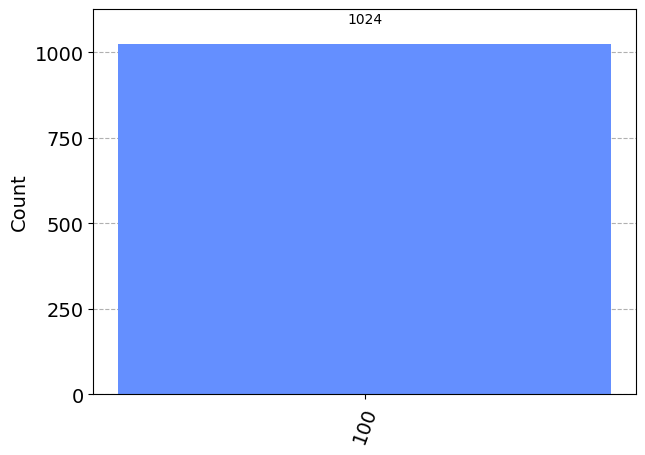

In [45]:


def deutsch_josza_oracle(n, balanced):
    
    # Create a diagonal gate to serve as the oracle
    if balanced:
        # For a balanced function half the elements are -1 and half are 1
        diag_elements = ([1] * (2 ** (n - 1)) + [-1] * (2 ** (n - 1)))
    else:
        # For a constant function all diagonal elements are 1 or -1
        diag_elements = [-1] * (2 ** n)
        
    oracle_gate = Diagonal(diag_elements)
    oracle_gate.name = 'Uf'

    # Create a quantum circuit with n input qubits plus one ancilla qubit
    qc = QuantumCircuit(n + 1, n)

    # Apply Hadamard gates to the input qubits
    qc.h(range(n))

    # Prepare the ancilla qubit in the |-> state
    qc.x(n)
    qc.h(n)

    # Apply the oracle to only the n function qubits, not including the ancilla
    qc.append(oracle_gate, range(n))

    # Apply Hadamard gates to the input qubits again
    qc.h(range(n))

    # Measurement on the input qubits only
    qc.measure(range(n), range(n))

    return qc

# Example usage
n = 3  # Number of qubits for the function (excluding the ancilla)
oracle_type = True  # True for balanced, False for constant
dj_circuit = deutsch_josza_oracle(n, oracle_type)

# Execute the circuit on a simulator
simulator = Aer.get_backend('qasm_simulator')
result = execute(dj_circuit, simulator, shots=1024).result()

# Get the counts and display the histogram
counts = result.get_counts(dj_circuit)
draw_circuit(dj_circuit)
print(counts)
plot_histogram(counts)


### The final outcome is that if we measure the top qubit in the circuit above, we will only get $|\mathbf{0} \rangle$ if the function is constant! In any other case, it is balanced.

# Helper Functions

In [5]:

def print_vector(amp, phi_no):
    # Basis states for a two-qubit system
    basis_states = ['|00⟩',  '|10⟩','|01⟩', '|11⟩']
    
    # Start with an empty string for the bra-ket notation
    phi1_bra_ket = ""
    # Convert the Statevector to a numpy array explicitly
    amp = np.asarray(amp)
    amp = np.around(amp, decimals=3)

    # Loop through each amplitude and basis state to construct the bra-ket string
    for amplitude, basis_state in zip(amp, basis_states):
        # Only include the basis states with non-zero amplitude
        if not np.isclose(amplitude, 0):
            # Add the term to the bra-ket string
            if amplitude>=0:
                phi1_bra_ket += f"+ {amplitude.real} {basis_state} "
            else:
                phi1_bra_ket += f" {amplitude.real} {basis_state} "
    
    # Remove the trailing ' + ' from the string
    phi1_bra_ket = phi1_bra_ket.rstrip(' + ')
    phi1_bra_ket = phi1_bra_ket.lstrip(' + ')
    
    
    # Print the bra-ket notation
    print(f"|ϕ{phi_no}⟩ = {phi1_bra_ket}")

In [46]:
style = {
    'fontsize': 13,
    'subfontsize': 8,
    'figwidth': 10,
    'displaycolor': {
        'id': '#ff0000',  # Red for the ID gate
        'u1': '#ff00ff',  # Purple for the U1 gate
        'u2': '#0000ff',  # Blue for the U2 gate
        'u3': '#800080',  # Indigo for the U3 gate
        'cx': '#00ff00'   # Green for the CNOT gate
    },
    'displaytext': {
        'id': 'I',
        'u1': 'U1',
        'u2': 'U2',
        'u3': 'U3',
        'cx': 'CX'
    }
}



In [24]:
def draw_circuit(qc):
    # Draw the circuit using the 'mpl' method
    circuit_diagram = circuit_drawer(qc, output='mpl', style='iqp')
    
    # Set the desired size
    circuit_diagram.set_size_inches(15, 5)
    
    # Display the circuit diagram
    return circuit_diagram
